In [33]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json
pylab.rcParams['figure.figsize'] = (15, 20.0)

In [34]:
file_path = '/home/sonic/Desktop/VideoAnalytics/YOLOX/bullet_emulator/YOLOX_outputs/bullet/downtown_miami.mp4_720p/dt_result.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [47]:
data

[{'image_id': 41,
  'category_id': 3,
  'bbox': [125.57356262207031,
   487.772705078125,
   115.70199584960938,
   53.2576904296875],
  'score': 0.9106152057647705,
  'segmentation': [],
  'id': 400},
 {'image_id': 41,
  'category_id': 3,
  'bbox': [42.87070083618164,
   472.6002502441406,
   62.3736686706543,
   41.143341064453125],
  'score': 0.8788468837738037,
  'segmentation': [],
  'id': 401},
 {'image_id': 41,
  'category_id': 3,
  'bbox': [527.6837158203125,
   479.56353759765625,
   59.8726806640625,
   37.875244140625],
  'score': 0.8748415112495422,
  'segmentation': [],
  'id': 402},
 {'image_id': 41,
  'category_id': 3,
  'bbox': [469.5106201171875,
   483.70330810546875,
   45.5977783203125,
   30.94451904296875],
  'score': 0.8666498064994812,
  'segmentation': [],
  'id': 403},
 {'image_id': 41,
  'category_id': 10,
  'bbox': [673.169921875, 196.9501495361328, 66.27490234375, 23.397705078125],
  'score': 0.846882700920105,
  'segmentation': [],
  'id': 404},
 {'image_i

In [36]:
annFile_dt = '/home/sonic/Desktop/VideoAnalytics/YOLOX/bullet_emulator/YOLOX_outputs/bullet/downtown_miami.mp4_720p/dt_result.json'
anns = json.load(open(annFile_dt))

type(anns)

list

In [81]:
b = [[3], [4]]
a = [[1], [2]]
a.append(b)
a[2]

[[3], [4]]

In [60]:
coco_categories['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [40]:
annFile_gt = '/home/sonic/Desktop/VideoAnalytics/YOLOX/bullet_emulator/YOLOX_outputs/bullet/downtown_miami.mp4_720p/gt_result.json'
annFile_dt = '/home/sonic/Desktop/VideoAnalytics/YOLOX/bullet_emulator/YOLOX_outputs/bullet/downtown_miami.mp4_720p/dt_result.json'

cocoGt = COCO(annFile_gt)
cocoDt = cocoGt.loadRes(annFile_dt)
imgIds=sorted(cocoGt.getImgIds())

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!


In [78]:
a = [3 ,4, 5]
for i,k in enumerate(a):
    a[i]  = k- 1
    
a

[2, 3, 4]

In [45]:
from pycocotools.cocoeval import COCOeval

coco_eval = COCOeval(cocoGt, cocoDt, 'bbox')

coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()
print(coco_eval.stats[0], coco_eval.stats[1])

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1

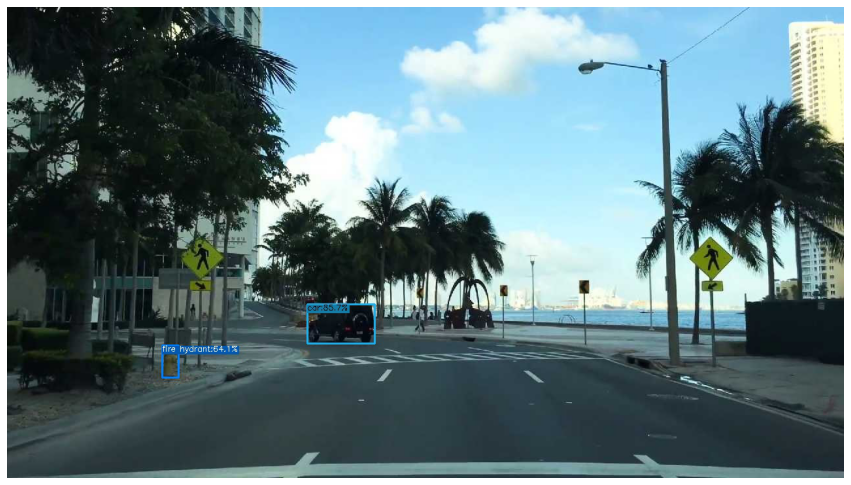

In [49]:
l = io.imread('./YOLOX_outputs/bullet/downtown_miami.mp4_720p/frame_15323.jpg')
plt.axis('off')
plt.imshow(l)
plt.show()

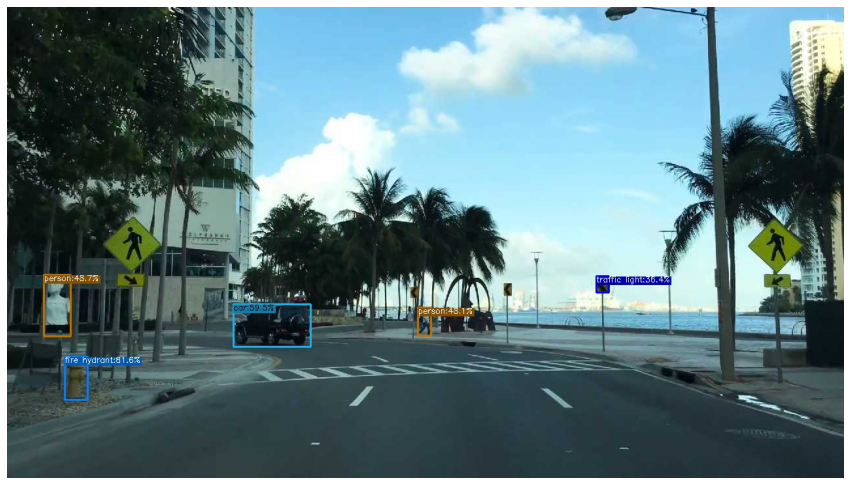

In [55]:
l = io.imread('./YOLOX_outputs/bullet/downtown_miami.mp4_720p/frame_15340.jpg')
plt.axis('off')
plt.imshow(l)
plt.show()